In [21]:
import pandas as pd
q_chunk = pd.read_csv("~/data0118/mutual_info/blastp_out_max_evalue_quantile", chunksize = 500)
s = 0
for q_c in q_chunk:
    q_c.dropna(inplace = True, axis = 'index')
    count = len(q_c['GCF_0000058252_ASM582v2_protein'])
    s += count

In [22]:
s
# none of all protein can use quantile discretisation

0

# Want to know why quantile distribution cannot work

In [15]:
pivot_refseq = pd.read_csv("~/data0118/mutual_info/blastp_out_max_evalue_pivot", nrows = 500, index_col = 0) # raw pivot table:

In [48]:
pivot_refseq.head()

,GCF_0000058252_ASM582v2_protein,GCF_0000058452_ASM584v2_protein,GCF_0000066051_ASM660v1_protein,GCF_0000066251_ASM662v1_protein,GCF_0000066451_ASM664v1_protein,GCF_0000066851_ASM668v1_protein,GCF_0000067251_ASM672v1_protein,GCF_0000067451_ASM674v1_protein,GCF_0000067651_ASM676v1_protein,GCF_0000067852_ASM678v2_protein,...,GCF_9004782751_34211_D02_protein,GCF_9004782951_35377_D02_protein,GCF_9004783151_34903_E01_protein,GCF_9004783251_33962_G01_protein,GCF_9004783951_32135_B01_protein,GCF_9004784151_35910_E02_protein,GCF_9004787151_31885_B02_protein,GCF_9004787351_33763_D01_protein,GCF_9004787551_32473_C02_protein,GCF_9004921651_chr1_protein
56210576con0001_19256210576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56210576con0001_34156210576,NaN,0.140107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56210576con0001_51156210576,NaN,1.371314,NaN,NaN,0.592262,NaN,NaN,0.39239,NaN,NaN,...,0.180616,NaN,NaN,0.182465,0.683418,NaN,NaN,0.186438,0.288287,NaN
56210576con0001_6156210576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56210576con0002_21456210576,NaN,0.614456,NaN,NaN,0.265346,NaN,NaN,NaN,0.21541,NaN,...,NaN,NaN,NaN,NaN,0.272766,NaN,0.155719,NaN,0.443872,NaN


In [16]:
# how does the transformed e-value distribute for 1 gene?
pivot_refseq_filled = pivot_refseq.fillna(0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefb3fbb908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fefb3e99b70>], dtype=object)

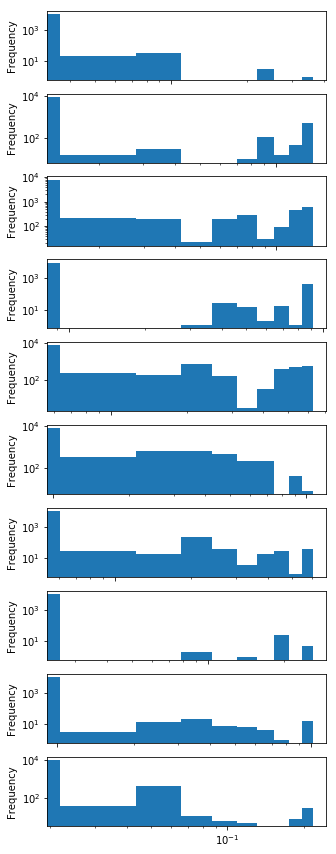

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 10, ncols=1)
num = 0
for i in pivot_refseq_filled.index[0:10]:
    pivot_refseq_filled.loc[i].plot(kind = 'hist', logx = True, ax = axes[num], figsize = (5,15), sharex = True,logy = True)
    num += 1

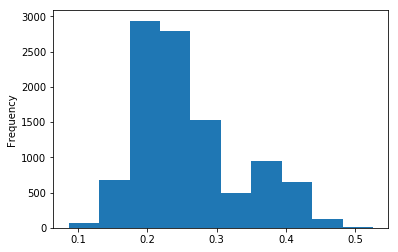

In [53]:
pivot.describe().loc['mean'].plot(kind = 'hist') # within one target genome

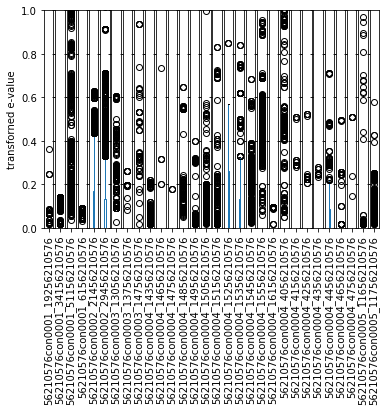

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols=30)
num = 0
for i in pivot_refseq_filled.index[0:30]:
    pivot_refseq_filled.loc[i].plot.box(ax = axes[num], sharey = True, ylim = (0,1), rot = 90)
    axes[num].set_ylabel('transforned e-value')
    num += 1

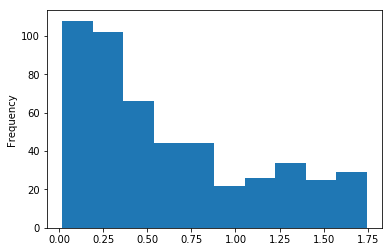

In [44]:
ref_range = ref_t.loc['max'] - ref_t.loc['min']
ref_range.plot(kind = 'hist')

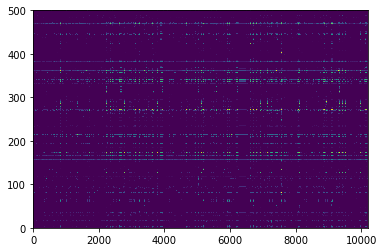

In [70]:
pivot_nona = pivot.fillna(0)

import matplotlib.pyplot as plt

plt.pcolor(pivot_nona)

# very sparse for refseq

In [1]:
import pandas as pd
ec_pivot = pd.read_csv("~/data0118/mutual_info/eskape_blastp_out_max_evalue_pivot", nrows = 500, index_col = 0)

In [2]:
ec_d = ec_pivot.describe()

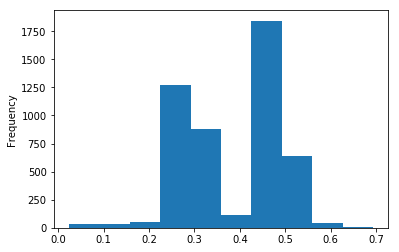

In [6]:
%matplotlib inline
ec_d.loc['mean'].plot(kind = 'hist') #within one target genome

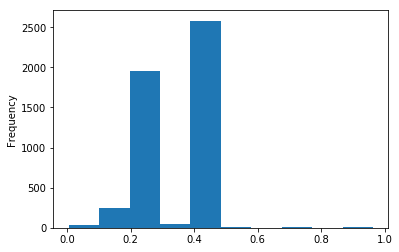

In [7]:
ec_d.loc['std'].plot(kind = 'hist') #within one target genome

In [10]:
ec_d_by_gene = ec_pivot.transpose().describe()

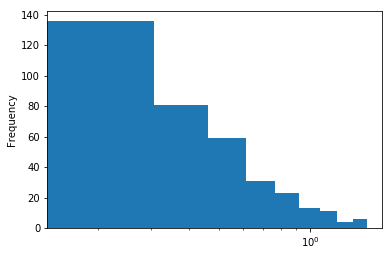

In [12]:
ec_d_by_gene.loc['mean'].plot(kind = 'hist', logx = True)

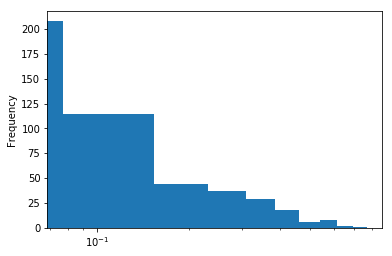

In [13]:
ec_d_by_gene.loc['std'].plot(kind = 'hist', logx = True)

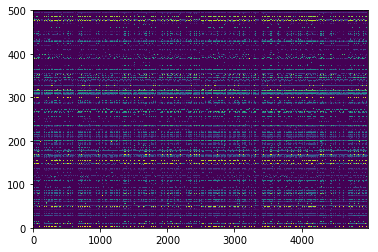

In [58]:
import matplotlib.pyplot as plt

plt.pcolor(ec_pivot.fillna(0))

# very sparse for refseq

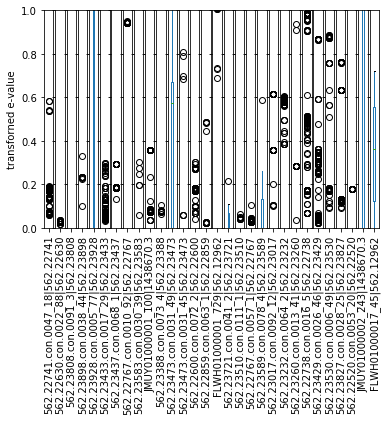

In [73]:
ec_pivot_filled = ec_pivot.fillna(0)
fig, axes = plt.subplots(nrows = 1, ncols=30)
num = 0
for i in ec_pivot_filled.index[0:30]:
    ec_pivot_filled.loc[i].plot.box(ax = axes[num], sharey = True, ylim = (0,1), rot = 90)
    axes[num].set_ylabel('transforned e-value')
    num += 1

In [75]:
ec_pivot_filled

,562.22937,470.4275,287.4346,470.575,562.23235,1284813.3,573.9929,1398962.6,85569.56,1284828.3,...,562.23098,562.23833,470.4041,562.22806,562.23714,470.3752,287.4325,562.23669,1398968.3,470.4404
562.22741.con.0047_18|562.22741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185843,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.22630.con.0022_88|562.22630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.23808.con.0091_3|562.23808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.23898.con.0038_44|562.23898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.23928.con.0005_77|562.23928,1.674484,0.000000,0.000000,0.000000,1.269451,0.000000,0.000000,0.0,0.000000,0.000000,...,1.687021,1.667860,0.000000,1.269451,0.938793,0.000000,0.000000,1.658741,0.000000,0.000000
562.23433.con.0017_29|562.23433,0.000000,0.000000,0.000000,0.000000,0.000000,0.070583,0.073752,0.0,0.000000,0.070713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.23437.con.0068_1|562.23437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.22767.con.0010_92|562.22767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
562.23583.con.0030_39|562.23583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JMUY01000001_100|1438670.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.357559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
